In [10]:
# Code to generate plot for emotion quandrants

# Generate sample data
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

rand_num_list = [round(random.random(),3) for i in range(1000)]
mean_vals =[]
num_obs = 20
x = [i for i in range(num_obs)]

start_val = 0
end_val = int(len(rand_num_list)/num_obs)

for obs_val in range(num_obs):
    rand_val = random.random()
    if rand_val > 0.6:
        mean_val = np.max(rand_num_list[start_val:end_val])
    elif rand_val < 0.2:
        mean_val = np.min(rand_num_list[start_val:end_val])
    else:
        mean_val = np.mean(rand_num_list[start_val:end_val])
    mean_vals.append(mean_val)
    start_val = end_val
    end_val = end_val+50

color_vals = []
q_vals = []
for mean_val in mean_vals:
    color_val = 'gray'
    q_val = 'Q1'
    if mean_val >=0.75:
        color_val = 'black'
        q_val = 'Q4'
    elif (mean_val >=0.5 and mean_val <0.75):
        color_val = 'blue'
        q_val = 'Q3'
    elif (mean_val >=0.25 and mean_val <0.5):
        color_val = 'green'
        q_val = 'Q4'
    color_vals.append(color_val)
    q_vals.append(q_val)

emotion_df = pd.DataFrame({'mer_val':mean_vals,
                           'quad_val':q_vals,
                          'color_code':color_vals}) 

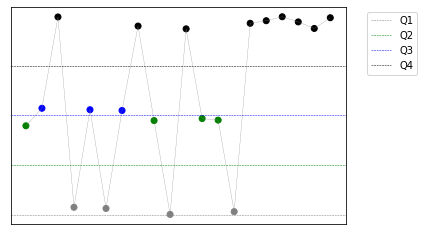

In [11]:
plt.plot(x,mean_vals, color = 'gray', linewidth=0.25)
plt.scatter(x,mean_vals, c=color_vals)
plt.axhline(y=0, c='gray', linestyle='--',  linewidth=0.5, label='Q1')
plt.axhline(y=0.25, c='green', linestyle='--',  linewidth=0.5, label='Q2')
plt.axhline(y=0.5, c='blue', linestyle='--',  linewidth=0.5, label='Q3')
plt.axhline(y=0.75, c='black', linestyle='--',  linewidth=0.5, label='Q4')
ax=plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

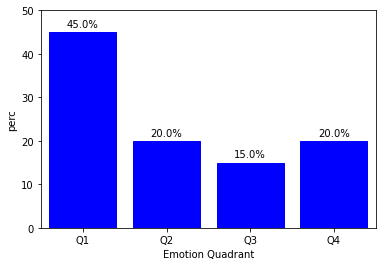

In [12]:
emotion_df_grp = pd.DataFrame(emotion_df.groupby(['color_code'])['mer_val'].count()).reset_index()
emotion_df_grp['perc'] = round((emotion_df_grp['mer_val']/sum(emotion_df_grp['mer_val']))*100,2)
emotion_df_grp['Emotion Quadrant'] = emotion_df_grp.apply(lambda x: 'Q1' if x.color_code == 'black' 
                                                          else ('Q2' if x.color_code == 'green' 
                                                                else ('Q3' if x.color_code == 'blue' else 'Q4')), axis=1)

emotion_df_grp.sort_values(by=['Emotion Quadrant'], inplace=True)

sns_plot = sns.barplot(x="Emotion Quadrant", y="perc", data=emotion_df_grp)
for bar in sns_plot.patches:
    sns_plot.annotate(str(bar.get_height())+"%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    bar.set_color('blue')

plt.ylim(0,sum(emotion_df_grp['mer_val'])+30)
plt.show()

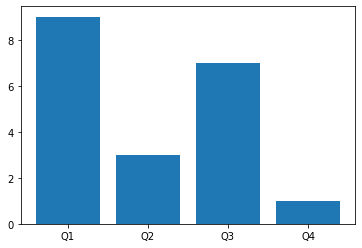

In [5]:
plt.bar(["Q1","Q2","Q3","Q4"],emotion_df.groupby(['color_code'])['mer_val'].count())
plt.show()

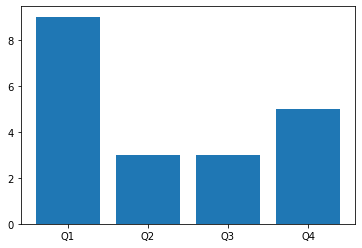

In [119]:
bar_plot = plt.bar(["Q1","Q2","Q3","Q4"],emotion_df_grp['mer_val'])


ValueError: Could not interpret input 'Emotion Quadrant'